### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  "font.size": 16,
  "grid.alpha": 0.25})

### Pre-processing

In [3]:
file_path = "./data/stock_2021(1).csv"
df_stock_21 = pd.read_csv(file_path)
df_stock_21["Bulan"] = pd.to_datetime(df_stock_21["Bulan"].astype(str) + "-2021", format="%m-%Y")
df_stock_21["Bulan"] = df_stock_21["Bulan"].dt.strftime("%Y-%m")
df_stock_21

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe
0,2021-01,R4Z,1858,5200022541,JM61E1126463,JM6112LK138354,LD0,LD0
1,2021-01,R4Z,1858,5200022541,JM61E1128750,JM6110LK129071,LD0,LD0
2,2021-01,R4Z,1858,5200022541,JM61E1129395,JM6112LK129394,LD0,LD0
3,2021-01,R4Z,1858,5200022541,JM91E1288702,JM9114LK290539,LK0,LK0A
4,2021-01,R4Z,1858,5200022541,JM91E1295308,JM9110LK294474,LK0,LK0A
...,...,...,...,...,...,...,...,...
681,2021-12,R4Z,1858,5200022541,KF41E2336342,KF4122MK331231,HWD,HWDA
682,2021-12,R4Z,1858,5200022541,KF41E2380033,KF4125MK376003,HW4,HW4A
683,2021-12,R4Z,1858,5200022541,KF41E2410459,KF4123MK406440,HW4,HW4A
684,2021-12,R4Z,1858,5200022541,KF71E1157830,KF7116MK157723,LR0,LR0


In [4]:
df_stock_21_initial = df_stock_21.copy()
df_stock_21_initial["initial Varian Plus"] = df_stock_21_initial["Kode Tipe AHM"].apply(lambda x: x[0])
df_stock_21_initial

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
0,2021-01,R4Z,1858,5200022541,JM61E1126463,JM6112LK138354,LD0,LD0,L
1,2021-01,R4Z,1858,5200022541,JM61E1128750,JM6110LK129071,LD0,LD0,L
2,2021-01,R4Z,1858,5200022541,JM61E1129395,JM6112LK129394,LD0,LD0,L
3,2021-01,R4Z,1858,5200022541,JM91E1288702,JM9114LK290539,LK0,LK0A,L
4,2021-01,R4Z,1858,5200022541,JM91E1295308,JM9110LK294474,LK0,LK0A,L
...,...,...,...,...,...,...,...,...,...
681,2021-12,R4Z,1858,5200022541,KF41E2336342,KF4122MK331231,HWD,HWDA,H
682,2021-12,R4Z,1858,5200022541,KF41E2380033,KF4125MK376003,HW4,HW4A,H
683,2021-12,R4Z,1858,5200022541,KF41E2410459,KF4123MK406440,HW4,HW4A,H
684,2021-12,R4Z,1858,5200022541,KF71E1157830,KF7116MK157723,LR0,LR0,L


In [5]:
df_stock_21_count = df_stock_21_initial[["initial Varian Plus"]].copy()
df_stock_21_count["count"] = 1.
df_stock_21_count = df_stock_21_count.groupby("initial Varian Plus").agg("count").reset_index()
df_stock_21_count

,initial Varian Plus,count
0,E,37
1,G,17
2,H,196
3,J,30
4,L,364
5,M,42


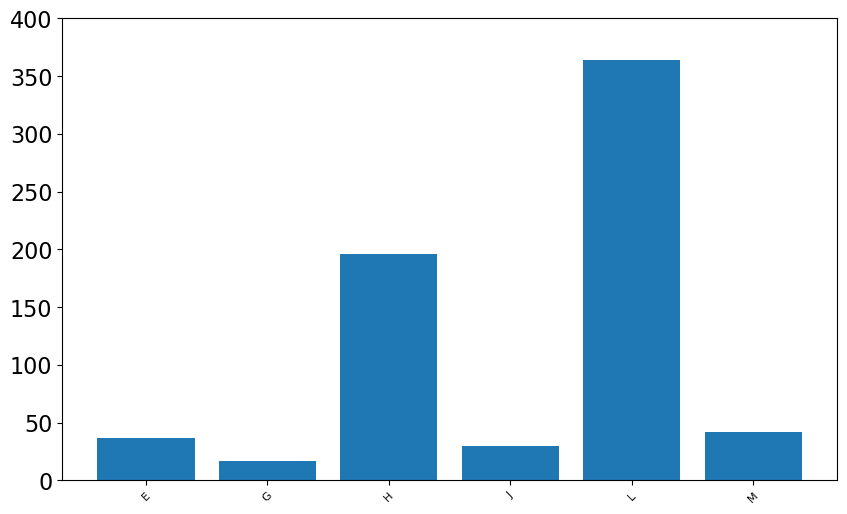

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

# because pandas includes right endpoint, we must subtract by one
x_data = df_stock_21_count["initial Varian Plus"]
y_data = df_stock_21_count["count"]
ax.bar(x_data, y_data)

ax.set_xticks(np.arange(len(x_data)))
ax.set_xticklabels(x_data, rotation=45, fontsize=8)

ax.set_ylim([0, 400])

plt.subplots_adjust(hspace=0.3)
plt.show()

### Varian E

In [7]:
df_stock_E = df_stock_21_initial[df_stock_21_initial["initial Varian Plus"] == "E"].copy()
df_stock_E

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
15,2021-01,R4Z,1858,5200022541,KC92E1049384,KC9217LK051850,EXF,EXF,E
16,2021-01,R4Z,1858,5200022541,KC93E1013569,KC9315LK012477,EYE,EYE,E
17,2021-01,R4Z,1858,5200022541,KCA2E1084088,KCA210LK088546,EW2,EW2,E
89,2021-02,R4Z,576,5200022542,KC01E1067808,KC0118RK067819,EH2,EH2,E
90,2021-02,R4Z,576,5200022542,KC01E1067839,KC0110RK067829,EH2,EH2,E
91,2021-02,R4Z,576,5200022542,KC01E1067846,KC0118RK067836,EH2,EH2,E
92,2021-02,R4Z,576,5200022542,KC01E1067852,KC0113RK067842,EH2,EH2,E
93,2021-02,R4Z,576,5200022542,KC01E1067914,KC0116RK067902,EH2,EH2,E
94,2021-02,R4Z,576,5200022542,KC01E1067923,KC0119RK067912,EH2,EH2,E
95,2021-02,R4Z,576,5200022542,KC01E1067927,KC0116RK067916,EH2,EH2,E


In [8]:
df_E_count = df_stock_E[["Bulan"]].copy()
df_E_count["count"] = 1.
df_E_count = df_E_count.groupby("Bulan").agg("count").reset_index()
df_E_count

,Bulan,count
0,2021-01,3
1,2021-02,27
2,2021-03,2
3,2021-04,2
4,2021-05,1
5,2021-10,2


In [9]:
df_E_count["Bulan"] = pd.to_datetime(df_E_count["Bulan"])

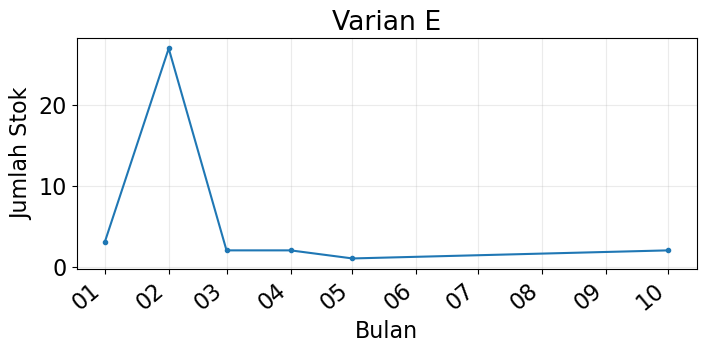

In [10]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_E_count["Bulan"], df_E_count["count"], linestyle="-",
        marker=".")

formatter = mdates.DateFormatter("%m")
# locator = mdates.YearLocator(base=2)
# locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 1))
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")

ax.set_title("Varian E")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_horizontalalignment('right')

plt.show(fig)

### Varian G

In [11]:
df_stock_G = df_stock_21_initial[df_stock_21_initial["initial Varian Plus"] == "G"].copy()
df_stock_G

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
25,2021-02,R4Z,576,5200022542,JBK1E2006377,JBK129RK008796,GB4,GB4,G
26,2021-02,R4Z,576,5200022542,JBK1E2045918,JBK125RK048292,GB4,GB4,G
27,2021-02,R4Z,576,5200022542,JBN1E1241723,JBN112RK241671,GE5,GE5,G
28,2021-02,R4Z,576,5200022542,JBP1E2067533,JBP122RK067301,GF5,GF5,G
29,2021-02,R4Z,576,5200022542,JBP1E2068620,JBP122RK068528,GF5,GF5,G
153,2021-03,R4Z,1858,5200022541,JBK1E1746304,JBK110MK750293,GB3,GB3,G
154,2021-03,R4Z,1858,5200022541,JBP1E1815605,JBP114MK815353,GF4,GF4,G
198,2021-04,R4Z,1858,5200022541,JBK1E1746304,JBK110MK750293,GB3,GB3,G
199,2021-04,R4Z,1858,5200022541,JBK3E1359584,JBK318MK361155,GD3,GD3,G
276,2021-05,R4Z,1858,5200022541,JBK3E1364466,JBK318MK366193,GD3,GD3,G


In [12]:
df_G_count = df_stock_G[["Bulan"]].copy()
df_G_count["count"] = 1.
df_G_count = df_G_count.groupby("Bulan").agg("count").reset_index()
df_G_count

,Bulan,count
0,2021-02,5
1,2021-03,2
2,2021-04,2
3,2021-05,2
4,2021-06,2
5,2021-07,3
6,2021-09,1


In [13]:
df_G_count["Bulan"] = pd.to_datetime(df_G_count["Bulan"])

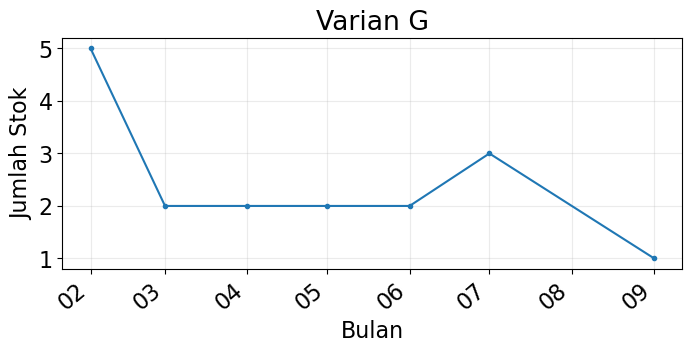

In [14]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_G_count["Bulan"], df_G_count["count"], linestyle="-",
        marker=".")

formatter = mdates.DateFormatter("%m")
# locator = mdates.YearLocator(base=2)
# locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 1))
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")

ax.set_title("Varian G")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_horizontalalignment('right')

plt.show(fig)

### Varian H

In [15]:
df_stock_H = df_stock_21_initial[df_stock_21_initial["initial Varian Plus"] == "H"].copy()
df_stock_H

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
6,2021-01,R4Z,1858,5200022541,KB11E1244261,KB1116LK244786,HDN,HDN,H
7,2021-01,R4Z,1858,5200022541,KB22E1007332,KB2219LK007374,HJK,HJK,H
8,2021-01,R4Z,1858,5200022541,KB22E1008213,KB2214LK008237,HJK,HJK,H
9,2021-01,R4Z,1858,5200022541,KB22E1008751,KB2213LK008892,HJ9,HJ9,H
10,2021-01,R4Z,1858,5200022541,KB22E1008800,KB2214LK008948,HJ9,HJ9,H
...,...,...,...,...,...,...,...,...,...
676,2021-12,R4Z,1858,5200022541,KB11E1312916,KB1116MK313283,HDP,HDP,H
677,2021-12,R4Z,1858,5200022541,KB11E1314442,KB1112MK314799,HDN,HDN,H
681,2021-12,R4Z,1858,5200022541,KF41E2336342,KF4122MK331231,HWD,HWDA,H
682,2021-12,R4Z,1858,5200022541,KF41E2380033,KF4125MK376003,HW4,HW4A,H


In [16]:
df_H_count = df_stock_H[["Bulan"]].copy()
df_H_count["count"] = 1.
df_H_count = df_H_count.groupby("Bulan").agg("count").reset_index()
df_H_count

,Bulan,count
0,2021-01,16
1,2021-02,4
2,2021-03,17
3,2021-04,32
4,2021-05,20
5,2021-06,18
6,2021-07,10
7,2021-08,14
8,2021-09,17
9,2021-10,26


In [17]:
df_H_count["Bulan"] = pd.to_datetime(df_H_count["Bulan"])

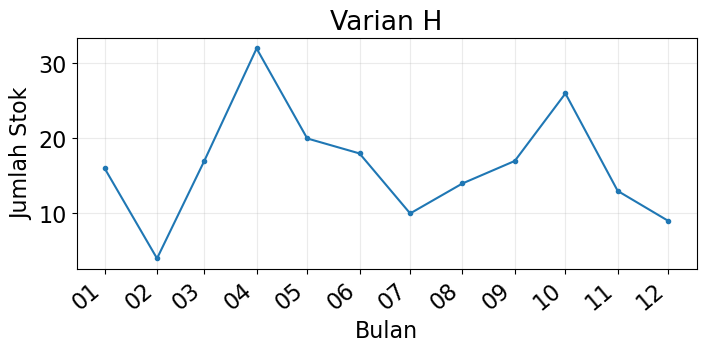

In [18]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_H_count["Bulan"], df_H_count["count"], linestyle="-",
        marker=".")

formatter = mdates.DateFormatter("%m")
# locator = mdates.YearLocator(base=2)
# locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 1))
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")

ax.set_title("Varian H")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_horizontalalignment('right')

plt.show(fig)

### Varian J

In [19]:
df_stock_J = df_stock_21_initial[df_stock_21_initial["initial Varian Plus"] == "J"].copy()
df_stock_J

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
107,2021-02,R4Z,576,5200022542,KCC1E1013645,KCC119PK013704,JNT,JNT,J
108,2021-02,R4Z,576,5200022542,KCD1E1020221,KCD110RK020288,JR0,JR0,J
109,2021-02,R4Z,576,5200022542,KCD2E1046363,KCD213RK046494,JS0,JS0,J
110,2021-02,R4Z,576,5200022542,KCD2E1046663,KCD219RK046712,JS0,JS0,J
111,2021-02,R4Z,576,5200022542,KCE1E1018566,KCE112PK018495,JXA,JXA,J
112,2021-02,R4Z,576,5200022542,KCE1E1020332,KCE112PK020506,JXA,JXA,J
113,2021-02,R4Z,576,5200022542,KCE1E1022581,KCE118PK022664,JX0,JX0,J
114,2021-02,R4Z,576,5200022542,KCE1E1022794,KCE116PK022873,JX0,JX0,J
115,2021-02,R4Z,576,5200022542,KCE1E1022846,KCE115PK023027,JXA,JXA,J
116,2021-02,R4Z,576,5200022542,KCE1E1023077,KCE117PK023238,JXA,JXA,J


In [20]:
df_J_count = df_stock_J[["Bulan"]].copy()
df_J_count["count"] = 1.
df_J_count = df_J_count.groupby("Bulan").agg("count").reset_index()
df_J_count

,Bulan,count
0,2021-02,12
1,2021-03,1
2,2021-04,1
3,2021-05,1
4,2021-07,2
5,2021-08,2
6,2021-09,2
7,2021-10,3
8,2021-11,3
9,2021-12,3


In [21]:
df_J_count["Bulan"] = pd.to_datetime(df_J_count["Bulan"])

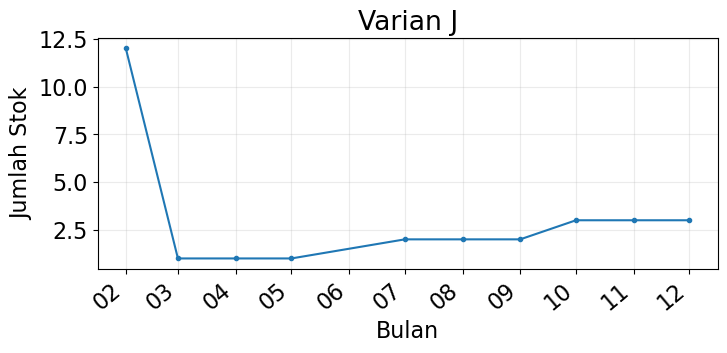

In [22]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_J_count["Bulan"], df_J_count["count"], linestyle="-",
        marker=".")

formatter = mdates.DateFormatter("%m")
# locator = mdates.YearLocator(base=2)
# locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 1))
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")

ax.set_title("Varian J")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_horizontalalignment('right')

plt.show(fig)

### Varian L

In [23]:
df_stock_L = df_stock_21_initial[df_stock_21_initial["initial Varian Plus"] == "L"].copy()
df_stock_L

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
0,2021-01,R4Z,1858,5200022541,JM61E1126463,JM6112LK138354,LD0,LD0,L
1,2021-01,R4Z,1858,5200022541,JM61E1128750,JM6110LK129071,LD0,LD0,L
2,2021-01,R4Z,1858,5200022541,JM61E1129395,JM6112LK129394,LD0,LD0,L
3,2021-01,R4Z,1858,5200022541,JM91E1288702,JM9114LK290539,LK0,LK0A,L
4,2021-01,R4Z,1858,5200022541,JM91E1295308,JM9110LK294474,LK0,LK0A,L
...,...,...,...,...,...,...,...,...,...
669,2021-12,R4Z,1858,5200022541,JM02E1486142,JM0219MK490425,LPA,LPAB,L
671,2021-12,R4Z,1858,5200022541,JM81E1796404,JM8115MK794321,LH1,LH1A,L
672,2021-12,R4Z,1858,5200022541,JM82E1269943,JM8210MK271903,LJ0,LJ0,L
684,2021-12,R4Z,1858,5200022541,KF71E1157830,KF7116MK157723,LR0,LR0,L


In [24]:
df_L_count = df_stock_L[["Bulan"]].copy()
df_L_count["count"] = 1.
df_L_count = df_L_count.groupby("Bulan").agg("count").reset_index()
df_L_count

,Bulan,count
0,2021-01,6
1,2021-02,38
2,2021-03,23
3,2021-04,41
4,2021-05,44
5,2021-06,46
6,2021-07,27
7,2021-08,31
8,2021-09,32
9,2021-10,36


In [25]:
df_L_count["Bulan"] = pd.to_datetime(df_L_count["Bulan"])

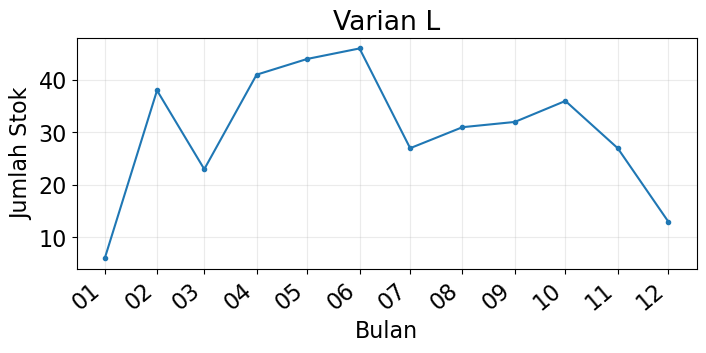

In [26]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_L_count["Bulan"], df_L_count["count"], linestyle="-",
        marker=".")

formatter = mdates.DateFormatter("%m")
# locator = mdates.YearLocator(base=2)
# locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 1))
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")

ax.set_title("Varian L")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_horizontalalignment('right')

plt.show(fig)

### Varian M

In [27]:
df_stock_M = df_stock_21_initial[df_stock_21_initial["initial Varian Plus"] == "M"].copy()
df_stock_M

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
50,2021-02,R4Z,576,5200022542,JMC1E1479876,JMC111RK480787,MC1,MC1A,M
51,2021-02,R4Z,576,5200022542,JMC1E1481095,JMC116RK481384,MC1,MC1A,M
52,2021-02,R4Z,576,5200022542,JMC1E1481247,JMC113RK482198,MC1,MC1A,M
53,2021-02,R4Z,576,5200022542,JMD1E1692068,JMD118RK692463,MD1,MD1A,M
54,2021-02,R4Z,576,5200022542,JMD1E1697310,JMD112RK697710,MD1,MD1A,M
55,2021-02,R4Z,576,5200022542,JMD1E1699702,JMD116RK700088,MD1,MD1A,M
56,2021-02,R4Z,576,5200022542,JME1E1039539,JME116RK039457,MJ0,MJ0B,M
57,2021-02,R4Z,576,5200022542,JME1E1112002,JME11XRK111938,MJ0,MJ0B,M
58,2021-02,R4Z,576,5200022542,JME1E1119683,JME114RK119534,MJ0,MJ0B,M
59,2021-02,R4Z,576,5200022542,JME1E1128329,JME117RK128406,MJ0,MJ0B,M


In [28]:
df_M_count = df_stock_M[["Bulan"]].copy()
df_M_count["count"] = 1.
df_M_count = df_M_count.groupby("Bulan").agg("count").reset_index()
df_M_count

,Bulan,count
0,2021-02,42


In [29]:
df_M_count["Bulan"] = pd.to_datetime(df_M_count["Bulan"])

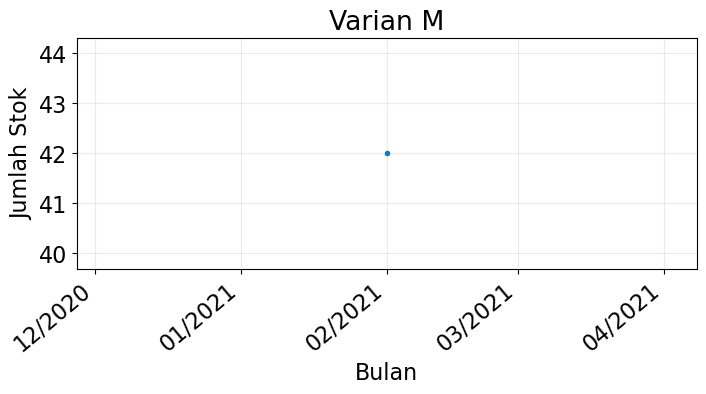

In [30]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(df_M_count["Bulan"], df_M_count["count"], linestyle="-",
        marker=".")

formatter = mdates.DateFormatter("%m/%Y")
# locator = mdates.YearLocator(base=2)
# locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 1))
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")

ax.set_title("Varian M")

for j, label in enumerate(ax.get_xticklabels()):
  label.set_rotation(40)
  label.set_horizontalalignment('right')

plt.show(fig)

### Agregrasi Jumlah Pembeli

In [31]:
df_stock_21_count

,initial Varian Plus,count
0,E,37
1,G,17
2,H,196
3,J,30
4,L,364
5,M,42
